# Evaluate SRSF1 binding analysis of RNA-seq profiles

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

## RBP knockdown expected to induce change in mean binding affinity

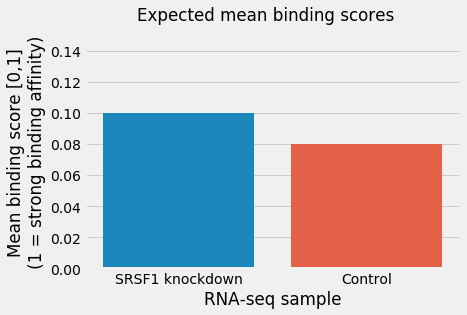

In [30]:
with plt.style.context('fivethirtyeight'):
    sns.barplot(x=['SRSF1 knockdown', 'Control'], y=[0.1, 0.08])
    plt.suptitle('Expected mean binding scores\n')
    plt.ylim(0, 0.15)
    plt.ylabel('Mean binding score [0,1]\n(1 = strong binding affinity)', fontsize='large')
    plt.xlabel('RNA-seq sample', fontsize='large')

In [31]:
def plot_mean_binding_scores(pred_paths, rbp):
    data = [] # holds bootstrap means for all samples
    
    # process each set of scores separately
    for p in pred_paths:
        # parse sample name
        sample = p.split('/')[2].split('.')[0]

        # load binding scores
        pred = pd.read_csv(p, sep='\t', header=None)[0].values

        # bin data into bootstrap samples
        sample_size = 500
        iterations = 100
        pred = pd.DataFrame(pred.reshape((sample_size, iterations)))

        # Compute bootstrap means
        means = pd.DataFrame(pred.apply(np.mean), columns=['mean'])
        
        # label data
        means['sample'] = sample
        data.append(means)

    data = pd.concat(data)

    # Plot boxplots and swarmplots for each sample
    with plt.style.context('fivethirtyeight'):
        # Specify figure size
        plt.figure(figsize=(10,7))
        
        # boxplot
        ax = sns.boxplot(x='sample', y='mean', data=data, color='orange', dodge=False, linewidth=2)
        
        # overlayed swarmplot
        sns.swarmplot(x='sample', y='mean', data=data, color='black', size=7, alpha=0.5, ax=ax)
        
        # Format titles, axes, and legends
        plt.suptitle(f'{rbp} estimated mean binding score', size=18)
        plt.xlabel(f'Sample\n(sample size=500, bootstrap iterations=100)')
        plt.ylabel('Mean binding score [0,1]\n(1 = strong binding affinity))')
        plt.legend(bbox_to_anchor=(1,1))

No handles with labels found to put in legend.


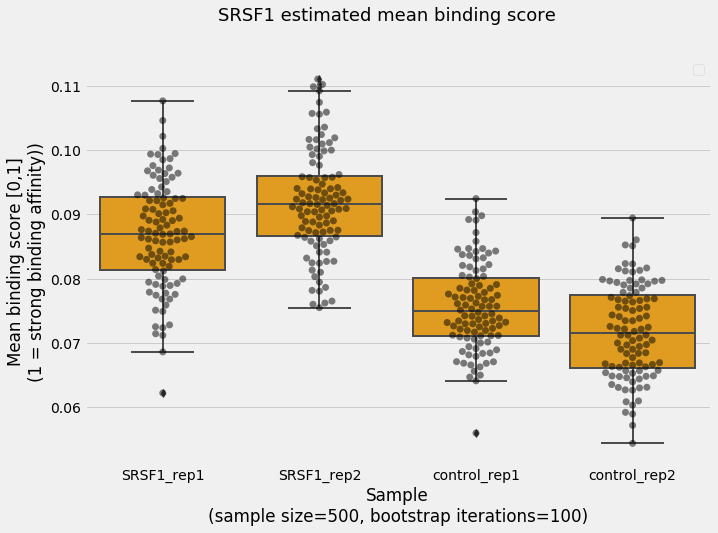

In [32]:
srsf1_pred_paths = ['../results/SRSF1_rep1.n5000_i10.pred.txt',
              '../results/SRSF1_rep2.n5000_i10.pred.txt',
              '../results/control_rep1.n5000_i10.pred.txt',
              '../results/control_rep2.n5000_i10.pred.txt']

plot_mean_binding_scores(srsf1_pred_paths, 'SRSF1')

No handles with labels found to put in legend.


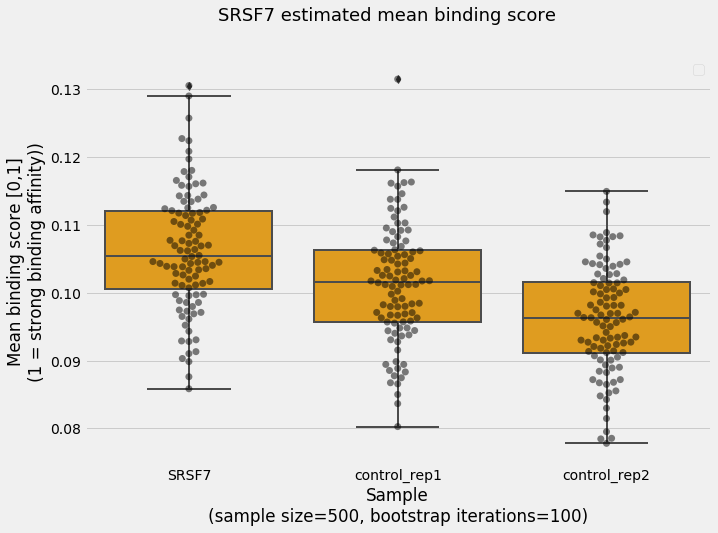

In [33]:
srsf7_pred_paths = ['../results/SRSF7.filt.50000.SRSF7_pred.txt',
                    '../results/control_rep1.filt.50000.SRSF7_pred.txt',
                    '../results/control_rep2.filt.50000.SRSF7_pred.txt']
plot_mean_binding_scores(srsf7_pred_paths, 'SRSF7')

No handles with labels found to put in legend.


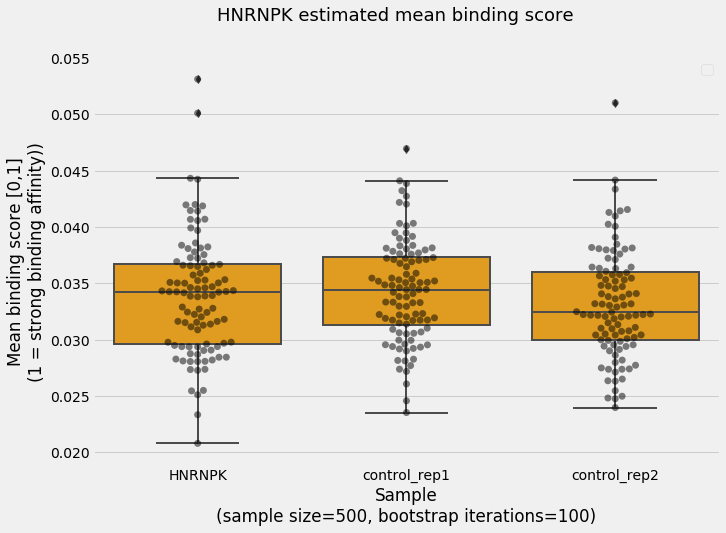

In [34]:
hnrnpk_pred_paths = ['../results/HNRNPK.filt.50000.HNRNPK_pred.txt',
                    '../results/control_rep1.filt.50000.HNRNPK_pred.txt',
                    '../results/control_rep2.filt.50000.HNRNPK_pred.txt']
plot_mean_binding_scores(hnrnpk_pred_paths, 'HNRNPK')